<a href="https://colab.research.google.com/github/vnscience/DataMining/blob/main/KPDL_BTH02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Câu 1: Khởi động và Tải dữ liệu

In [3]:
url = "https://github.com/anhdung98/diem_thi_2024/releases/download/240717/diem_thi_thpt_2024.csv"
import pandas as pd

df = pd.read_csv(url)
df.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,N1
1,1000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1
2,1000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1
3,1000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1
4,1000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1


In [4]:
# 1.1. Tổng số thí sinh có trong bộ dữ liệu là bao nhiêu?
num_students = df.shape[0]
print(f"Tổng số thí sinh trong bộ dữ liệu là: {num_students}")

Tổng số thí sinh trong bộ dữ liệu là: 1061605


1.2. Giải thích bằng lời cách tính điểm tổ hợp KHTN (Lý, Hóa, Sinh) và KHXH (Sử, Địa,
GDCD) cho một thí sinh.

## Câu 2: Phân tích Chuyên sâu và Trực quan hóa

In [28]:
# 2.1. Có tổng cộng bao nhiêu bài thi môn Toán đã được chấm?
df['toan'].count()

np.int64(1045613)

In [29]:
# 2.2. Xây dựng phổ điểm của môn Toán
import numpy as np
bins = np.arange(0, 10.2, 0.2)
pho_diem_toan = df['toan'].value_counts(bins=bins).sort_index()
pho_diem_toan

,count
"(-0.001, 0.2]",1
"(0.2, 0.4]",1
"(0.4, 0.6]",5
"(0.6, 0.8]",12
"(0.8, 1.0]",43
"(1.0, 1.2]",126
"(1.2, 1.4]",278
"(1.4, 1.6]",619
"(1.6, 1.8]",1156
"(1.8, 2.0]",1975


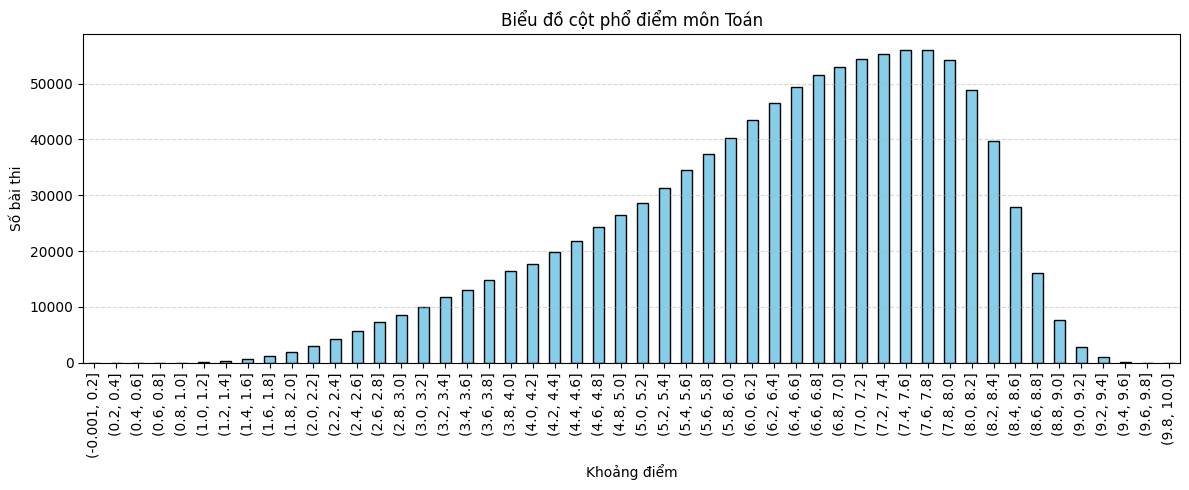

In [30]:
import matplotlib.pyplot as plt
pho_diem_toan.plot(kind='bar', figsize=(12, 5), color='skyblue', edgecolor='black')
plt.title("Biểu đồ cột phổ điểm môn Toán")
plt.xlabel("Khoảng điểm")
plt.ylabel("Số bài thi")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [31]:
df['toan'].describe()

,toan
count,1.045613e+06
mean,6.447309e+00
std,1.556900e+00
min,0.000000e+00
25%,5.400000e+00
50%,6.800000e+00
75%,7.600000e+00
max,9.800000e+00


In [32]:
mean_toan = df['toan'].mean()
median_toan = df['toan'].median()
mode_toan = df['toan'].mode()[0]
std_toan = df['toan'].std()

In [33]:
mode_toan

np.float64(7.6)

1. Số bài thi môn Toán: 1,045,613 thí sinh.

2. Phổ điểm môn Toán:
  
  * Cho thấy sự phân bố số lượng thí sinh theo từng khoảng điểm.
  * Khoảng điểm có nhiều thí sinh đạt nhất là: (7.4, 7.6] (56,017 thí sinh).

3. Các giá trị thống kê cho môn Toán:

  * Điểm trung bình: 6.447
  * Điểm trung vị: 6.8
  * Mode: 7.6
  * Độ lệch chuẩn: 1.557

## Câu 3: Lọc Dữ liệu và Phân tích So sánh

In [39]:
# 3.1. Tìm hiểu và cho biết mã tỉnh của TP. Hồ Chí Minh (02) và Hà Nội (01)
df['sbd'] = df['sbd'].astype(str).str.zfill(8)
df['ma_tinh'] = df['sbd'].str[:2]

In [42]:
# 3.2. Trích xuất 2 bộ dữ liệu riêng: df_hcm (dữ liệu của TPHCM) và df_hanoi (dữ liệu của Hà Nội).
df_hanoi = df[df['ma_tinh'] == '01'].copy()
df_hcm = df[df['ma_tinh'] == '02'].copy()

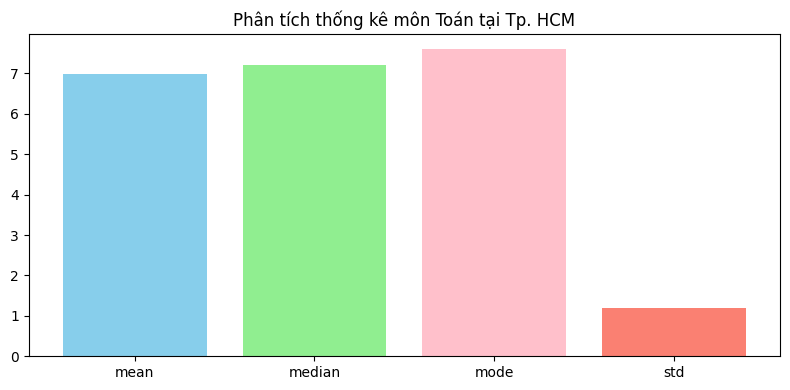

In [43]:
# 3.3. Phân tích môn Toán
## Ho Chi Minh
stats_toan_hcm = {
    'mean' : df_hcm['toan'].mean(),
    'median' : df_hcm['toan'].median(),
    'mode' : df_hcm['toan'].mode()[0],
    'std' : df_hcm['toan'].std()
}

plt.figure(figsize=(8, 4))
plt.bar(stats_toan_hcm.keys(), stats_toan_hcm.values(), color=['skyblue', 'lightgreen', 'pink', 'salmon'])
plt.title("Phân tích thống kê môn Toán tại Tp. HCM")
plt.tight_layout()
plt.show()

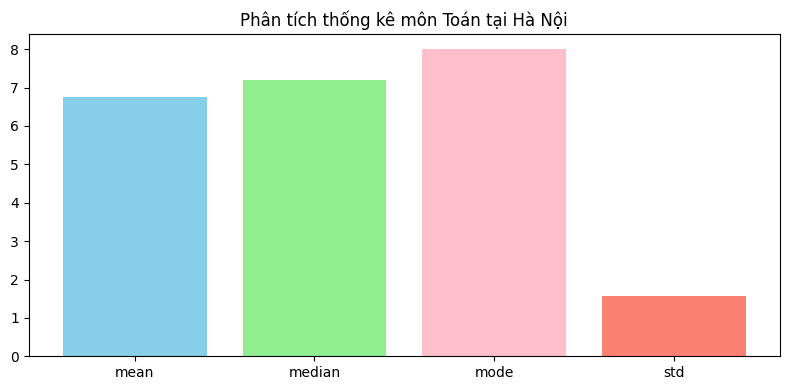

In [44]:
## Ha Noi
stats_toan_hanoi = {
    'mean' : df_hanoi['toan'].mean(),
    'median' : df_hanoi['toan'].median(),
    'mode' : df_hanoi['toan'].mode()[0],
    'std' : df_hanoi['toan'].std()
}

plt.figure(figsize=(8, 4))
plt.bar(stats_toan_hanoi.keys(), stats_toan_hanoi.values(), color=['skyblue', 'lightgreen', 'pink', 'salmon'])
plt.title("Phân tích thống kê môn Toán tại Hà Nội")
plt.tight_layout()
plt.show()

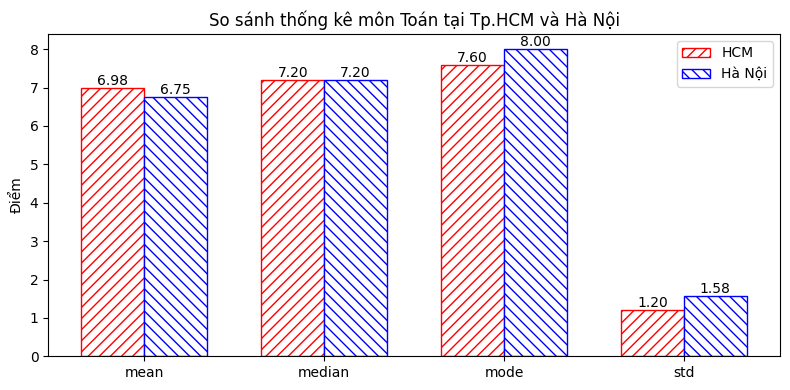

In [54]:
labels = list(stats_toan_hcm.keys())
hcm_values = list(stats_toan_hcm.values())
hn_values = list(stats_toan_hanoi.values())

x = np.arange(len(labels)) # Vị trí các cột
width = 0.35 # Độ rộng mỗi cột

plt.figure(figsize=(8, 4))
bars_hcm = plt.bar(x - width/2, hcm_values, width, label="HCM", color='white', edgecolor='red', hatch="///")
bars_hn = plt.bar(x + width/2, hn_values, width, label="Hà Nội", color='white', edgecolor='blue', hatch="\\\\\\")

plt.xticks(x, labels)
plt.title('So sánh thống kê môn Toán tại Tp.HCM và Hà Nội')
plt.ylabel('Điểm')
plt.legend()

# Thêm nhãn giá trị cho từng cột
for bars in [bars_hcm, bars_hn]:
  for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va="bottom", fontsize=10)

plt.tight_layout()
plt.show()


In [57]:
# 3.4. Thử thách: Tạo một cột mới Diem_Tong_Cong
score_cols = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
df_hcm[score_cols] = df_hcm[score_cols].fillna(0)

df_hcm['KHTN'] = df_hcm['vat_li'] + df_hcm['hoa_hoc'] + df_hcm['sinh_hoc']
df_hcm['KHXH'] = df_hcm['lich_su'] + df_hcm['dia_li'] + df_hcm['gdcd']

df_hcm['Diem_Tong_Cong'] = df_hcm['toan'] + df_hcm['ngu_van'] + df_hcm['ngoai_ngu'] + df_hcm[['KHTN', 'KHXH']].max(axis=1)

df_hcm.to_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/DiemToanTHPT24/diem_thi_hcm.csv', index=False)

In [58]:
df_hanoi[score_cols] = df_hanoi[score_cols].fillna(0)

df_hanoi['KHTN'] = df_hanoi['vat_li'] + df_hanoi['hoa_hoc'] + df_hanoi['sinh_hoc']
df_hanoi['KHXH'] = df_hanoi['lich_su'] + df_hanoi['dia_li'] + df_hanoi['gdcd']

df_hanoi['Diem_Tong_Cong'] = df_hanoi['toan'] + df_hanoi['ngu_van'] + df_hanoi['ngoai_ngu'] + df_hanoi[['KHTN', 'KHXH']].max(axis=1)

df_hanoi.to_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/DiemToanTHPT24/diem_thi_hanoi.csv', index=False)

## Câu 4: Áp dụng Logic Phức tạp - Xếp loại Tốt nghiệp

In [68]:
import numpy as np
df_hcm_raw = df[df['ma_tinh'] == '02'].copy()
mon_bb = ['toan', 'ngu_van', 'ngoai_ngu']
mon_khtn, mon_khxh = ['vat_li', 'hoa_hoc', 'sinh_hoc'], ['lich_su', 'dia_li', 'gdcd']
mon_khtn_all, mon_khxh_all = mon_bb + mon_khtn, mon_bb + mon_khxh
khtn = df_hcm_raw[mon_khtn].notna().all(1)
khxh = df_hcm_raw[mon_khxh].notna().all(1)

# Tất cả gán ban đầu là không tốt nghiệp, sẽ cập nhật sau:
df_hcm_raw['xep_loai'] = 'Không tốt nghiệp'

mask = khtn | khxh

# Nếu khtn là true, thì tính điểm trung bình của nhóm KHTN, ngược lại tính điểm trung bình của nhóm KHXH
dxtn = np.where(
    khtn,
    df_hcm_raw[mon_khtn_all].mean(1),
    df_hcm_raw[mon_khxh_all].mean(1)
)
# Kiểm tra xem có môn <= 1.0 không?
co_duoi_1 = np.where(
    khtn,
    (df_hcm_raw[mon_khtn_all].min(1) <= 1),
    (df_hcm_raw[mon_khxh_all].min(1) <= 1)
)
rot = (~mask) | co_duoi_1 | (dxtn < 5)
# ~mask là không có tổ hợp hợp lệ

gioi = (dxtn >= 8.0) & np.where(
    khtn,
    (df_hcm_raw[mon_khtn_all] >= 7).all(1),
    (df_hcm_raw[mon_khxh_all] >= 7).all(1)
)
kha = (dxtn >= 6.5) & np.where(
    khtn,
    (df_hcm_raw[mon_khtn_all] >= 6).all(1),
    (df_hcm_raw[mon_khxh_all] >= 6).all(1)
)
df_hcm_raw.loc[gioi & ~rot, 'xep_loai'] = 'Giỏi'
df_hcm_raw.loc[kha & ~rot & ~gioi, 'xep_loai'] = 'Khá'
df_hcm_raw.loc[~kha & ~rot & ~gioi, 'xep_loai'] = 'Trung bình'

df_hcm_raw['xep_loai'].value_counts()

,count
xep_loai,
Trung bình,53078
Khá,18357
Không tốt nghiệp,12035
Giỏi,3852


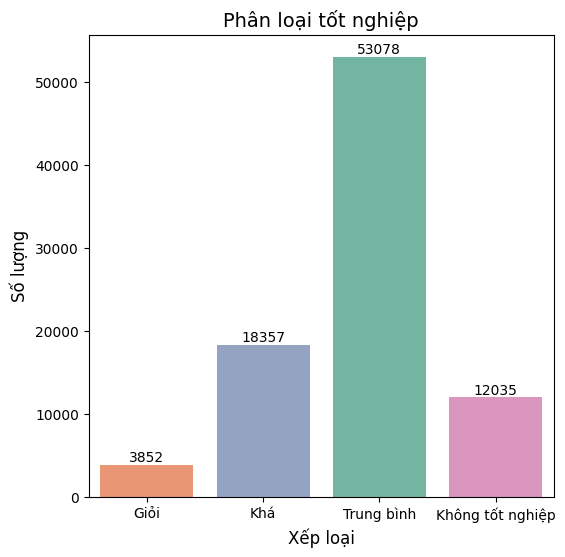

In [67]:
import seaborn as sns

plt.figure(figsize=(6, 6))

ax = sns.countplot(x="xep_loai", hue="xep_loai", data=df_hcm_raw, order=['Giỏi', 'Khá', 'Trung bình', 'Không tốt nghiệp'], palette='Set2')

plt.title('Phân loại tốt nghiệp', fontsize=14)
plt.xlabel('Xếp loại', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'),
              (p.get_x() + p.get_width()/ 2., p.get_height()),
              ha="center", va='bottom', fontsize=10
              )

plt.show()